<a href="https://colab.research.google.com/github/MASOC24/ChatBot/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Upload the dataset
data_path = files.upload()  # Use Google Colab's file upload widget



Saving Dataset.csv to Dataset.csv



Dataset loaded successfully.

First five rows of the dataset:
       Post ID                                   Post description        Date  \
0  CgXDOaQDvGm  “I have decided that the global #monkeypox out...  07/23/2022   
1  CgXpRmMIdzG  In light of the evolving monkeypox outbreak wi...  07/23/2022   
2  CgXMyIjP34S  #LinkInBio | The World Health Organization sai...  07/23/2022   
3  CgXaFGDsevq  If you've been hearing about monkeypox and wan...  07/23/2022   
4  CgX3rATJTXd  Our horrific experience with MONKEYPOX…\n\n#mo...  07/23/2022   

  Language                        Translated Post Description Sentiment  \
0  English  “I have decided that the global #monkeypox out...   neutral   
1  English  In light of the evolving monkeypox outbreak wi...   neutral   
2  English  #LinkInBio | The World Health Organization sai...      fear   
3  English  If you've been hearing about monkeypox and wan...   neutral   
4  English  Our horrific experience with MONKEYPOX…\n\n#mo...      fear   


<ipython-input-6-2b02c6e4b258>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='viridis')


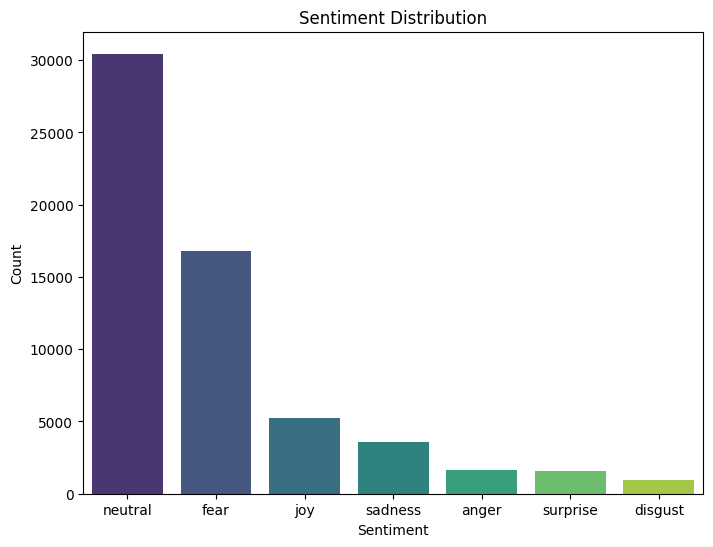

<ipython-input-6-2b02c6e4b258>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stress or Anxiety', order=df['Stress or Anxiety'].value_counts().index, palette='cool')


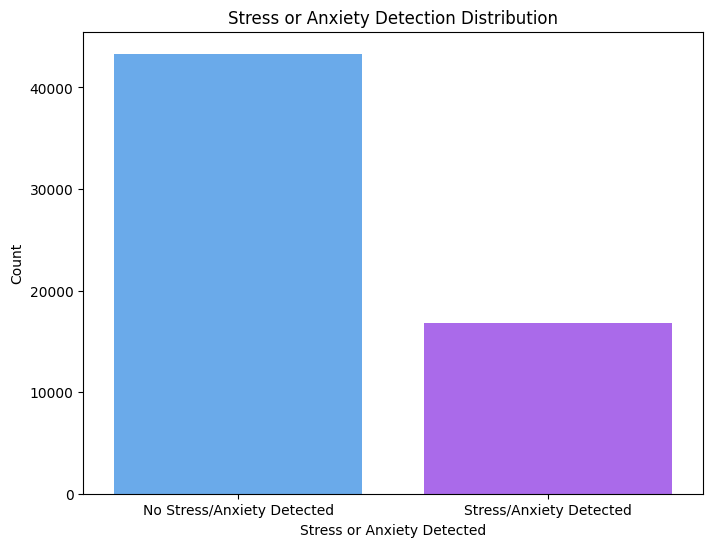

<ipython-input-6-2b02c6e4b258>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hate', order=df['Hate'].value_counts().index, palette='muted')


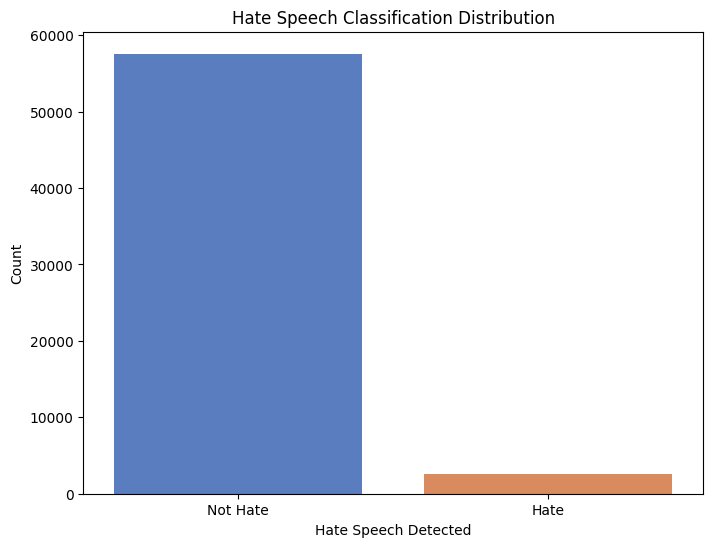


Word count in Post Descriptions:
                                    Post description  Word Count
0  “I have decided that the global #monkeypox out...          30
1  In light of the evolving monkeypox outbreak wi...          61
2  #LinkInBio | The World Health Organization sai...          46
3  If you've been hearing about monkeypox and wan...          22
4  Our horrific experience with MONKEYPOX…\n\n#mo...           9


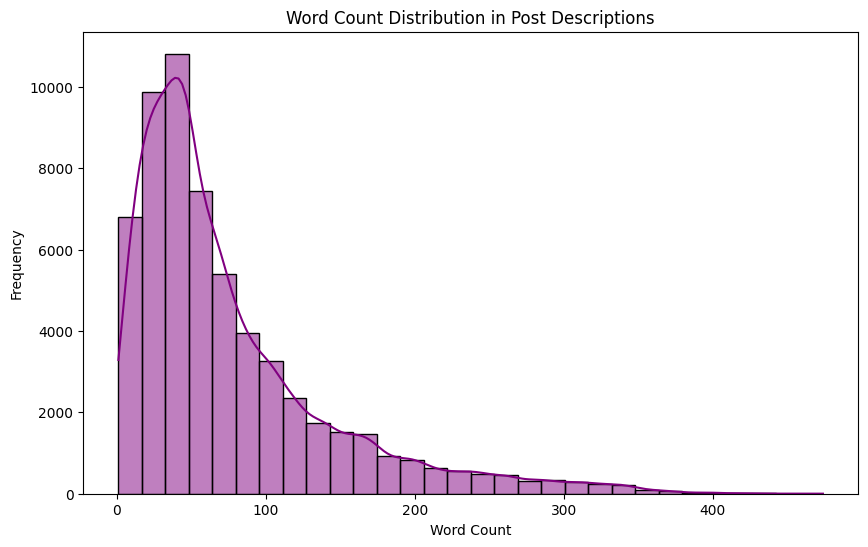


Preparing data for Hate vs No Hate analysis...

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     11514
           1       0.80      0.30      0.43       512

    accuracy                           0.97     12026
   macro avg       0.89      0.65      0.71     12026
weighted avg       0.96      0.97      0.96     12026


Confusion Matrix:
[[11477    37]
 [  360   152]]

Accuracy Score:
0.9669881922501248


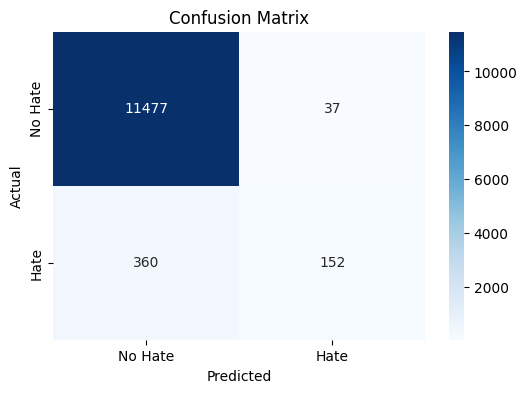

In [6]:
# Load the dataset with robust error handling
try:
    df = pd.read_csv(list(data_path.keys())[0])  # Let Pandas detect the delimiter
    print("\nDataset loaded successfully.")
except pd.errors.ParserError as e:
    print("\nParserError: Trying fallback methods.")
    try:
        df = pd.read_csv(list(data_path.keys())[0], delimiter=',')  # Try comma-separated
        print("\nDataset loaded successfully with comma delimiter.")
    except Exception as e2:
        print("\nFallback failed. Please check the dataset format.", str(e2))
        raise

# Display the first few rows
print("\nFirst five rows of the dataset:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
df.info()

# Summary statistics for numerical data (if any)
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique values in each column:")
for column in df.select_dtypes(include=['object']):
    print(f"{column}: {df[column].nunique()} unique values")

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Stress or Anxiety Detection distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Stress or Anxiety', order=df['Stress or Anxiety'].value_counts().index, palette='cool')
plt.title('Stress or Anxiety Detection Distribution')
plt.xlabel('Stress or Anxiety Detected')
plt.ylabel('Count')
plt.show()

# Hate speech classification distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hate', order=df['Hate'].value_counts().index, palette='muted')
plt.title('Hate Speech Classification Distribution')
plt.xlabel('Hate Speech Detected')
plt.ylabel('Count')
plt.show()

# Check correlation matrix (if numerical data exists)
if not df.select_dtypes(include=['number']).empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

# Word count in Post Descriptions
print("\nWord count in Post Descriptions:")
df['Word Count'] = df['Post description'].apply(lambda x: len(str(x).split()))
print(df[['Post description', 'Word Count']].head())

# Visualize word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Word Count'], kde=True, bins=30, color='purple')
plt.title('Word Count Distribution in Post Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis: Hate vs No Hate
print("\nPreparing data for Hate vs No Hate analysis...")
X = df['Post description']
y = df['Hate'].apply(lambda x: 1 if x == 'Hate' else 0)  # Binary classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Hate', 'Hate'], yticklabels=['No Hate', 'Hate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Dataset loaded successfully.

First five rows of the dataset:
       Post ID                                   Post description        Date  \
0  CgXDOaQDvGm  “I have decided that the global #monkeypox out...  07/23/2022   
1  CgXpRmMIdzG  In light of the evolving monkeypox outbreak wi...  07/23/2022   
2  CgXMyIjP34S  #LinkInBio | The World Health Organization sai...  07/23/2022   
3  CgXaFGDsevq  If you've been hearing about monkeypox and wan...  07/23/2022   
4  CgX3rATJTXd  Our horrific experience with MONKEYPOX…\n\n#mo...  07/23/2022   

  Language                        Translated Post Description Sentiment  \
0  English  “I have decided that the global #monkeypox out...   neutral   
1  English  In light of the evolving monkeypox outbreak wi...   neutral   
2  English  #LinkInBio | The World Health Organization sai...      fear   
3  English  If you've been hearing about monkeypox and wan...   neutral   
4  English  Our horrific experience with MONKEYPOX…\n\n#mo...      fear   


<ipython-input-7-9e10990a6640>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='viridis')


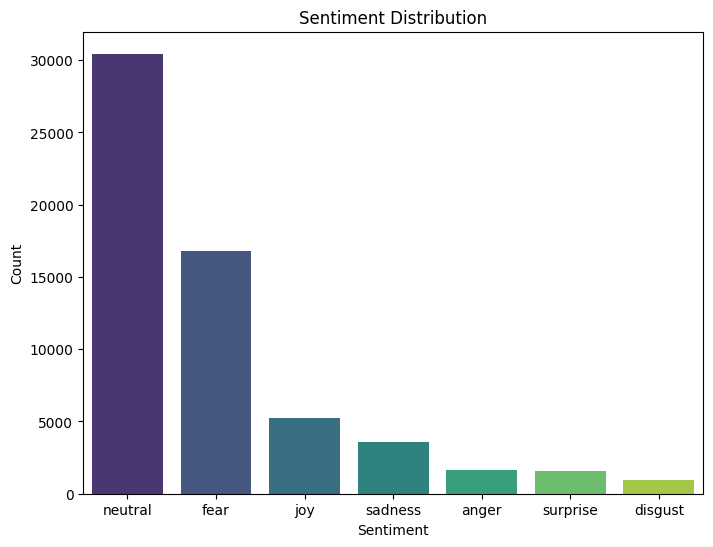

<ipython-input-7-9e10990a6640>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stress or Anxiety', order=df['Stress or Anxiety'].value_counts().index, palette='cool')


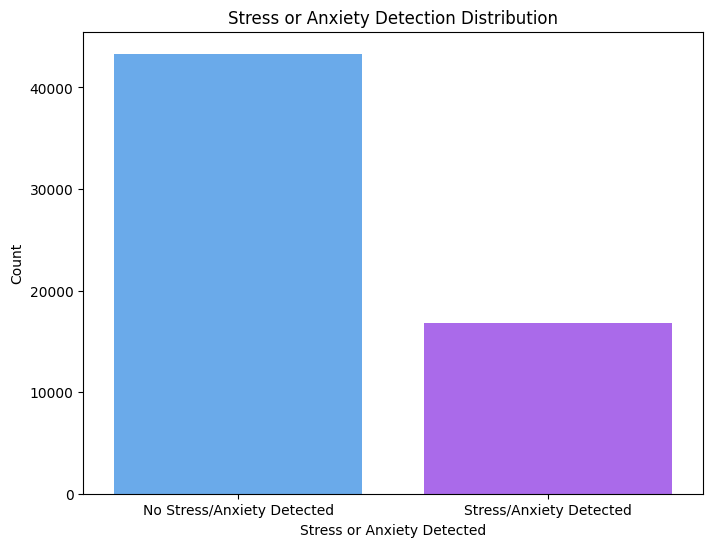

<ipython-input-7-9e10990a6640>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hate', order=df['Hate'].value_counts().index, palette='muted')


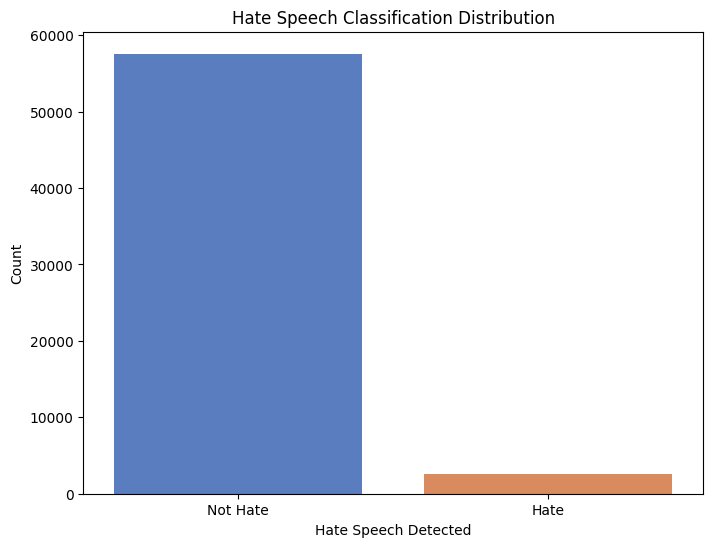


Word count in Post Descriptions:
                                    Post description  Word Count
0  “I have decided that the global #monkeypox out...          30
1  In light of the evolving monkeypox outbreak wi...          61
2  #LinkInBio | The World Health Organization sai...          46
3  If you've been hearing about monkeypox and wan...          22
4  Our horrific experience with MONKEYPOX…\n\n#mo...           9


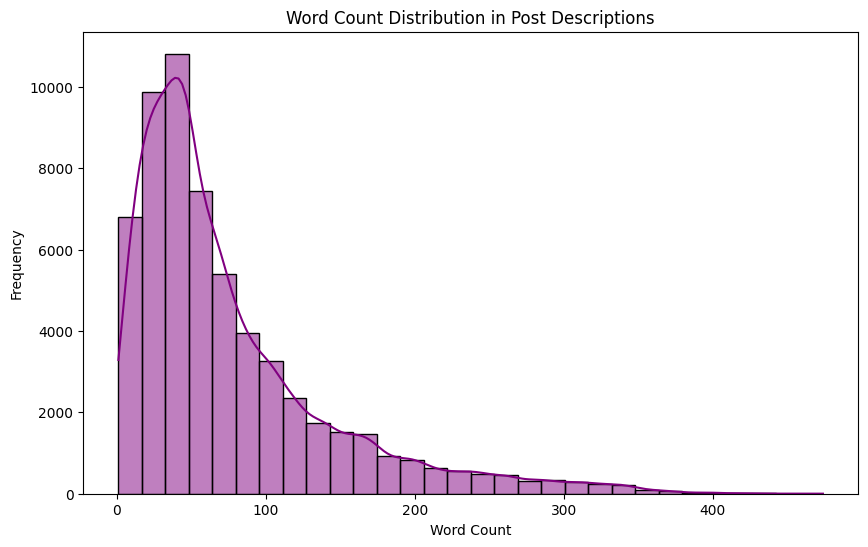


Preparing data for Hate vs No Hate analysis...

Training Logistic Regression model...

Training SVM model...

Training Random Forest model...

Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     11514
           1       0.80      0.30      0.43       512

    accuracy                           0.97     12026
   macro avg       0.89      0.65      0.71     12026
weighted avg       0.96      0.97      0.96     12026


Confusion Matrix:
[[11477    37]
 [  360   152]]

Accuracy Score:
0.9669881922501248


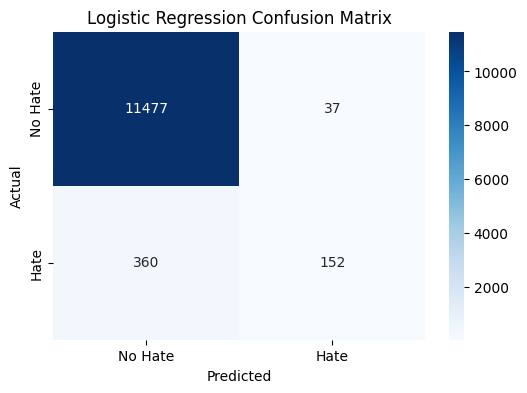


Evaluating SVM...

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     11514
           1       0.78      0.34      0.48       512

    accuracy                           0.97     12026
   macro avg       0.88      0.67      0.73     12026
weighted avg       0.96      0.97      0.96     12026


Confusion Matrix:
[[11464    50]
 [  336   176]]

Accuracy Score:
0.9679028770996175


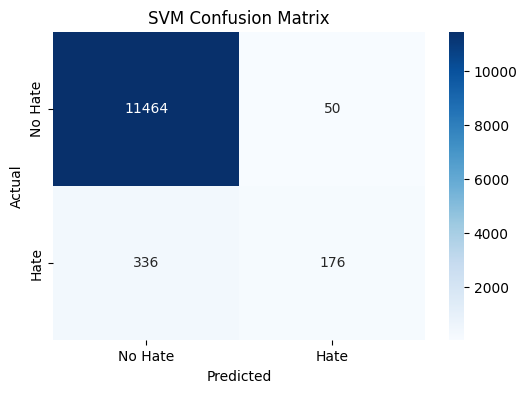


Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11514
           1       0.77      0.47      0.58       512

    accuracy                           0.97     12026
   macro avg       0.87      0.73      0.78     12026
weighted avg       0.97      0.97      0.97     12026


Confusion Matrix:
[[11441    73]
 [  271   241]]

Accuracy Score:
0.9713953101613172


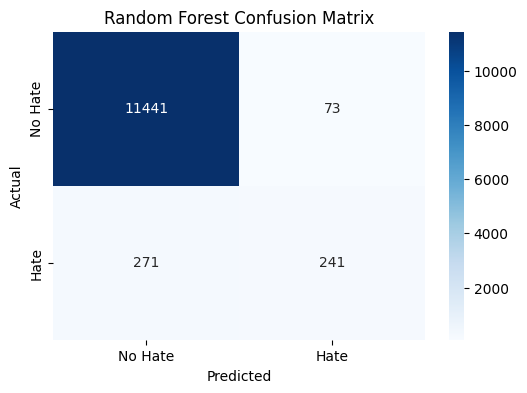

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Load the dataset with robust error handling
try:
    df = pd.read_csv(list(data_path.keys())[0])  # Let Pandas detect the delimiter
    print("\nDataset loaded successfully.")
except pd.errors.ParserError as e:
    print("\nParserError: Trying fallback methods.")
    try:
        df = pd.read_csv(list(data_path.keys())[0], delimiter=',')  # Try comma-separated
        print("\nDataset loaded successfully with comma delimiter.")
    except Exception as e2:
        print("\nFallback failed. Please check the dataset format.", str(e2))
        raise

# Display the first few rows
print("\nFirst five rows of the dataset:")
print(df.head())

# Check the structure of the dataset
print("\nDataset Info:")
df.info()

# Summary statistics for numerical data (if any)
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique values in each column:")
for column in df.select_dtypes(include=['object']):
    print(f"{column}: {df[column].nunique()} unique values")

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Stress or Anxiety Detection distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Stress or Anxiety', order=df['Stress or Anxiety'].value_counts().index, palette='cool')
plt.title('Stress or Anxiety Detection Distribution')
plt.xlabel('Stress or Anxiety Detected')
plt.ylabel('Count')
plt.show()

# Hate speech classification distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hate', order=df['Hate'].value_counts().index, palette='muted')
plt.title('Hate Speech Classification Distribution')
plt.xlabel('Hate Speech Detected')
plt.ylabel('Count')
plt.show()

# Check correlation matrix (if numerical data exists)
if not df.select_dtypes(include=['number']).empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

# Word count in Post Descriptions
print("\nWord count in Post Descriptions:")
df['Word Count'] = df['Post description'].apply(lambda x: len(str(x).split()))
print(df[['Post description', 'Word Count']].head())

# Visualize word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Word Count'], kde=True, bins=30, color='purple')
plt.title('Word Count Distribution in Post Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Sentiment Analysis: Hate vs No Hate
print("\nPreparing data for Hate vs No Hate analysis...")
X = df['Post description']
y = df['Hate'].apply(lambda x: 1 if x == 'Hate' else 0)  # Binary classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression model
print("\nTraining Logistic Regression model...")
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# SVM model
print("\nTraining SVM model...")
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Random Forest model
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Evaluate all models
def evaluate_model(model, name):
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test_tfidf)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Hate', 'Hate'], yticklabels=['No Hate', 'Hate'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare models
evaluate_model(lr_model, "Logistic Regression")
evaluate_model(svm_model, "SVM")
evaluate_model(rf_model, "Random Forest")
